In [856]:
import numpy as np
import pandas as pd

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

housing = pd.DataFrame(pd.read_csv("housing.csv"))


# Problem 1 Part a

In [857]:
#housing.values[:,:]
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

housing[varlist] = housing[varlist].apply(binary_map)

In [858]:
#Splitting the Data Training and Testing Sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [859]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

In [860]:
Newtrain = df_Newtrain.values[:,:5]
y_train = df_Newtrain.values[:,-1]
Newtest = df_Newtest.values[:,:5]
y_test = df_Newtest.values[:,-1]

m = [len(Newtrain), len(Newtest)]
print(m)

y_train = y_train.reshape(m[0],1)
X0 = np.ones((m[0],1))
Newtrain = np.hstack((X0, Newtrain))

y_test = y_test.reshape(m[1],1)
X0 = np.ones((m[1],1))
Newtest = np.hstack((X0, Newtest))

[436, 109]


In [861]:
def compute_loss(X, y, theta, m):

    h = X.dot(theta)
    error = np.subtract(h, y)
    sqrError = np.square(error)
    J = 1 / (2*m) * np.sum(sqrError)
    return J


In [862]:
def compute_loss_2(X, y, theta, m, lamda):

    h = X.dot(theta)
    error = np.subtract(h, y)
    sqrError = np.square(error)
    J = 1 / (2*m) * (np.sum(sqrError) + lamda*np.sum(np.square(theta)))
    return J

In [863]:
def gradient_descent(X, y, theta, alpha, iterations, m1, m2, X2, y2):
    
    
    loss_history_train = np.zeros(iterations)
    loss_history_validation = np.zeros(iterations)
    
    for i in range(iterations):
        
        h = X.dot(theta)
        error = np.subtract(h, y)
        sum_delta = (alpha / m1) * X.transpose().dot(error);
        theta = theta - sum_delta;
        loss_history_train[i] = compute_loss(X, y, theta, m1)
        loss_history_validation[i] = compute_loss(X2, y2, theta, m2)
    return theta, loss_history_train, loss_history_validation

In [864]:
def gradient_descent_2(X, y, theta, alpha, iterations, m1, m2, X2, y2, lamda):
    
    
    loss_history_train = np.zeros(iterations)
    loss_history_validation = np.zeros(iterations)
    
    for i in range(iterations):
        
        h = X.dot(theta)
        error = np.subtract(h, y)
        sum_delta = (alpha / m1) * X.transpose().dot(error);
        theta = theta - sum_delta;
        loss_history_train[i] = compute_loss_2(X, y, theta, m1, lamda)
        loss_history_validation[i] = compute_loss(X2, y2, theta, m2)
    return theta, loss_history_train, loss_history_validation

In [865]:
theta = np.zeros((6,1))
iterations = 20;
alpha = .00000001;

[[2.10904764e-01]
 [8.60537307e+02]
 [6.96209629e-01]
 [3.37624020e-01]
 [4.95240374e-01]
 [1.85764132e-01]]


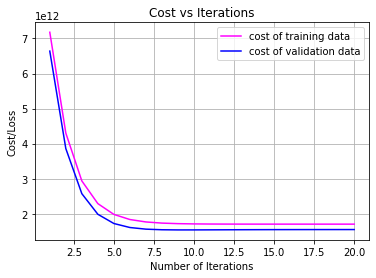

In [866]:
theta, loss_history_train, loss_history_validation = gradient_descent(Newtrain, y_train, theta, alpha, iterations, m[0], m[1], Newtest, y_test)

total_loss_for_train = loss_history_train.sum()
total_loss_for_validation = loss_history_validation.sum()
print(theta)

plt.plot(range(1, iterations + 1), loss_history_train, color='magenta', label='cost of training data')
plt.plot(range(1, iterations + 1), loss_history_validation, color='blue', label='cost of validation data')
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost/Loss')
plt.title('Cost vs Iterations')
plt.legend()

# Problem 1 Part b

In [867]:
Newtrain = df_train.values[:,1:12]
y_train = df_train.values[:,0]
Newtest = df_test.values[:,1:12]
y_test = df_test.values[:,0]

m = [len(Newtrain), len(Newtest)]
print(m)

y_train = y_train.reshape(m[0],1)
X0 = np.ones((m[0],1))
Newtrain = np.hstack((X0, Newtrain))

y_test = y_test.reshape(m[1],1)
X0 = np.ones((m[1],1))
Newtest = np.hstack((X0, Newtest))

print(Newtrain)

[436, 109]
[[1.0 3620 2 ... 0 0 0]
 [1.0 4000 2 ... 0 0 0]
 [1.0 3040 2 ... 0 0 0]
 ...
 [1.0 5750 3 ... 1 1 1]
 [1.0 3600 3 ... 0 1 0]
 [1.0 6600 3 ... 0 0 1]]


In [868]:
theta = np.zeros((12,1))
iterations = 100;
alpha = .000000001;

[[0.17074557509822785]
 [824.5032605043407]
 [0.5447757923500706]
 [0.25468564600006577]
 [0.36823503714884015]
 [0.1543454486644712]
 [0.04341253391652539]
 [0.07264001448224303]
 [0.011983817494254496]
 [0.08093779931129551]
 [0.14752615643151926]
 [0.05673308116446613]]


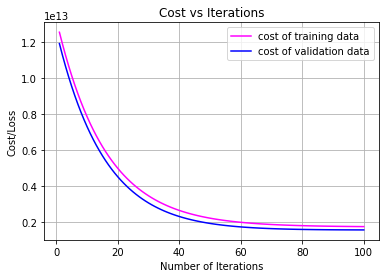

In [869]:
theta, loss_history_train, loss_history_validation = gradient_descent(Newtrain, y_train, theta, alpha, iterations, m[0], m[1], Newtest, y_test)

total_loss_for_train = loss_history_train.sum()
total_loss_for_validation = loss_history_validation.sum()
print(theta)

plt.plot(range(1, iterations + 1), loss_history_train, color='magenta', label='cost of training data')
plt.plot(range(1, iterations + 1), loss_history_validation, color='blue', label='cost of validation data')
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost/Loss')
plt.title('Cost vs Iterations')
plt.legend()

# Problem 2 part a

In [870]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# normalizing the input data and target column
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

In [871]:
y_Normtrain = df_Newtrain.pop('price')
X_Normtrain = df_Newtrain.copy()
y_validation = df_Newtest.pop('price')
x_validation = df_Newtest.copy()
x_validation.shape


(109, 5)

In [872]:
X_Normtrain = X_Normtrain.values
y_Normtrain = y_Normtrain.values
x_validation = x_validation.values
y_validation = y_validation.values

m = [len(X_Normtrain), len(x_validation)]
print(m)

y_Normtrain = y_Normtrain.reshape(m[0],1)
X0 = np.ones((m[0],1))
X_Normtrain = np.hstack((X0, X_Normtrain))

y_validation = y_validation.reshape(m[1],1)
X0 = np.ones((m[1],1))
x_validation = np.hstack((X0, x_validation))

[436, 109]


In [873]:
theta = np.zeros((6,1))
iterations = 2000;
alpha = .01;

[[0.09500384]
 [0.17381659]
 [0.09700371]
 [0.17097046]
 [0.13712255]
 [0.12607193]]


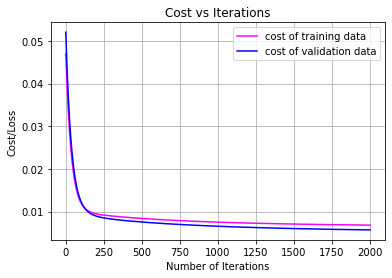

In [874]:
theta, loss_history_train, loss_history_validation = gradient_descent(X_Normtrain, y_Normtrain, theta, alpha, iterations, m[0], m[1], x_validation, y_validation)

total_loss_for_train = loss_history_train.sum()
total_loss_for_validation = loss_history_validation.sum()

print(theta)
plt.plot(range(1, iterations + 1), loss_history_train, color='magenta', label='cost of training data')
plt.plot(range(1, iterations + 1), loss_history_validation, color='blue', label='cost of validation data')
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost/Loss')
plt.title('Cost vs Iterations')
plt.legend()

# Standardized 6 inputs

In [875]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

In [876]:
# standardizing the input data and target column
scaler = StandardScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

In [877]:
y_Standardtrain = df_Newtrain.pop('price')
X_Standardtrain = df_Newtrain.copy()
y_validation = df_Newtest.pop('price')
x_validation = df_Newtest.copy()
x_validation.shape


(109, 5)

In [878]:
X_Standardtrain = X_Standardtrain.values
y_Standardtrain = y_Standardtrain.values
x_validation = x_validation.values
y_validation = y_validation.values

m = [len(X_Standardtrain), len(x_validation)]
print(m)

y_Standardtrain = y_Standardtrain.reshape(m[0],1)
X0 = np.ones((m[0],1))
X_Standardtrain = np.hstack((X0, X_Standardtrain))

y_validation = y_validation.reshape(m[1],1)
X0 = np.ones((m[1],1))
x_validation = np.hstack((X0, x_validation))

[436, 109]


In [879]:
theta = np.zeros((6,1))
iterations = 2000;
alpha = .01;

[[2.71752549e-16]
 [3.88481592e-01]
 [8.90651783e-02]
 [3.04158375e-01]
 [2.40438864e-01]
 [1.60108211e-01]]


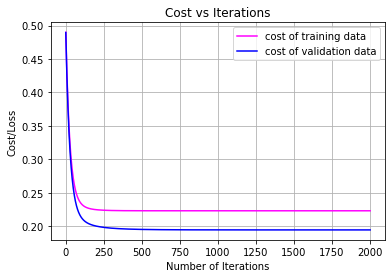

In [880]:
theta, loss_history_train, loss_history_validation = gradient_descent(X_Standardtrain, y_Standardtrain, theta, alpha, iterations, m[0], m[1], x_validation, y_validation)

total_loss_for_train = loss_history_train.sum()
total_loss_for_validation = loss_history_validation.sum()

print(theta)
plt.plot(range(1, iterations + 1), loss_history_train, color='magenta', label='cost of training data')
plt.plot(range(1, iterations + 1), loss_history_validation, color='blue', label='cost of validation data')
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost/Loss')
plt.title('Cost vs Iterations')
plt.legend()

# Problem 2 Part b 12 inputs normalized

In [881]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# normalizing the input data and target column
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [882]:
X_Normtrain = df_train.values[:,1:12]
y_Normtrain = df_train.values[:,0]
x_validation = df_test.values[:,1:12]
y_validation = df_test.values[:,0]

m = [len(X_Normtrain), len(x_validation)]
print(m)

y_Normtrain = y_Normtrain.reshape(m[0],1)
X0 = np.ones((m[0],1))
X_Normtrain = np.hstack((X0, X_Normtrain))

y_validation = y_validation.reshape(m[1],1)
X0 = np.ones((m[1],1))
x_validation = np.hstack((X0, x_validation))


[436, 109]


In [883]:
theta = np.zeros((12,1))
iterations = 1000;
alpha = .01;

[[0.04976613496239076]
 [0.07719053830345377]
 [0.05794529719456006]
 [0.10553149877276538]
 [0.08992899713034379]
 [0.05859842909513554]
 [0.04525963159012279]
 [0.02994134229754301]
 [0.03866410667921597]
 [0.09168724212116186]
 [0.07553271115511236]
 [0.07281426006088923]]


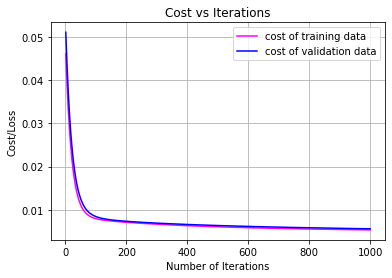

In [884]:
theta, loss_history_train, loss_history_validation = gradient_descent(X_Normtrain, y_Normtrain, theta, alpha, iterations, m[0], m[1], x_validation, y_validation)

total_loss_for_train = loss_history_train.sum()
total_loss_for_validation = loss_history_validation.sum()

print(theta)
plt.plot(range(1, iterations + 1), loss_history_train, color='magenta', label='cost of training data')
plt.plot(range(1, iterations + 1), loss_history_validation, color='blue', label='cost of validation data')
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost/Loss')
plt.title('Cost vs Iterations')
plt.legend()

# Standardized 12 inputs 

In [890]:
#Splitting the Data Training and Testing Sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [891]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# standardized the input data and target column
scaler = StandardScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [892]:
X_Standardtrain = df_train.values[:,1:12]
y_Standardtrain = df_train.values[:,0]
x_validation = df_test.values[:,1:12]
y_validation = df_test.values[:,0]

m = [len(X_Standardtrain), len(x_validation)]
print(m)

y_Standardtrain = y_Standardtrain.reshape(m[0],1)
X0 = np.ones((m[0],1))
X_Standardtrain = np.hstack((X0, X_Standardtrain))

y_validation = y_validation.reshape(m[1],1)
X0 = np.ones((m[1],1))
x_validation = np.hstack((X0, x_validation))

[436, 109]


In [893]:
theta = np.zeros((12,1))
iterations = 1000;
alpha = .01;

[[-0.3066449250153809]
 [0.31560548175921804]
 [0.06012389906546737]
 [0.26973837023374236]
 [0.22456841844544762]
 [0.038661385163101185]
 [0.19541168184825977]
 [0.18831154801038297]
 [0.15052588684240853]
 [0.344453251264239]
 [0.13952312856449864]
 [0.30940957505833416]]


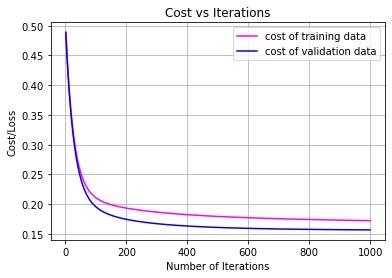

In [894]:
theta, loss_history_train, loss_history_validation = gradient_descent(X_Standardtrain, y_Standardtrain, theta, alpha, iterations, m[0], m[1], x_validation, y_validation)

total_loss_for_train = loss_history_train.sum()
total_loss_for_validation = loss_history_validation.sum()

print(theta)
plt.plot(range(1, iterations + 1), loss_history_train, color='magenta', label='cost of training data')
plt.plot(range(1, iterations + 1), loss_history_validation, color='blue', label='cost of validation data')
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost/Loss')
plt.title('Cost vs Iterations')
plt.legend()

# Problem 3 part a 6 inputs normalized with lamda term

In [895]:
#Splitting the Data Training and Testing Sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [896]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

In [897]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# normalizing the input data and target column
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

In [898]:
y_Normtrain = df_Newtrain.pop('price')
X_Normtrain = df_Newtrain.copy()
y_validation = df_Newtest.pop('price')
x_validation = df_Newtest.copy()
x_validation.shape


(109, 5)

In [899]:
X_Normtrain = X_Normtrain.values
y_Normtrain = y_Normtrain.values
x_validation = x_validation.values
y_validation = y_validation.values

m = [len(X_Normtrain), len(x_validation)]
print(m)

y_Normtrain = y_Normtrain.reshape(m[0],1)
X0 = np.ones((m[0],1))
X_Normtrain = np.hstack((X0, X_Normtrain))

y_validation = y_validation.reshape(m[1],1)
X0 = np.ones((m[1],1))
x_validation = np.hstack((X0, x_validation))

[436, 109]


In [900]:
theta = np.zeros((6,1))
iterations = 200;
alpha = .01;
lamda = .5;

[[0.16626374]
 [0.06035403]
 [0.07836145]
 [0.05491016]
 [0.07253807]
 [0.06527466]]


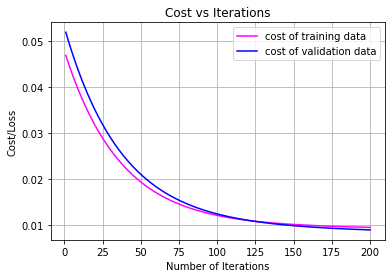

In [901]:
theta, loss_history_train, loss_history_validation = gradient_descent_2(X_Normtrain, y_Normtrain, theta, alpha, iterations, m[0], m[1], x_validation, y_validation, lamda)

total_loss_for_train = loss_history_train.sum()
total_loss_for_validation = loss_history_validation.sum()

print(theta)
plt.plot(range(1, iterations + 1), loss_history_train, color='magenta', label='cost of training data')
plt.plot(range(1, iterations + 1), loss_history_validation, color='blue', label='cost of validation data')
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost/Loss')
plt.title('Cost vs Iterations')
plt.legend()

# Standardized 6 inputs with the addition of lamda term

In [902]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

In [903]:
# standardizing the input data and target column
scaler = StandardScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

In [904]:
y_Standardtrain = df_Newtrain.pop('price')
X_Standardtrain = df_Newtrain.copy()
y_validation = df_Newtest.pop('price')
x_validation = df_Newtest.copy()
x_validation.shape

(109, 5)

In [905]:
X_Standardtrain = X_Standardtrain.values
y_Standardtrain = y_Standardtrain.values
x_validation = x_validation.values
y_validation = y_validation.values

m = [len(X_Standardtrain), len(x_validation)]
print(m)

y_Standardtrain = y_Standardtrain.reshape(m[0],1)
X0 = np.ones((m[0],1))
X_Standardtrain = np.hstack((X0, X_Standardtrain))

y_validation = y_validation.reshape(m[1],1)
X0 = np.ones((m[1],1))
x_validation = np.hstack((X0, x_validation))

[436, 109]


In [906]:
theta = np.zeros((6,1))
iterations = 200;
alpha = .01;
lamda = .5;

[[2.08693918e-16]
 [3.44868217e-01]
 [1.30798978e-01]
 [2.79721008e-01]
 [2.18254291e-01]
 [1.75921275e-01]]


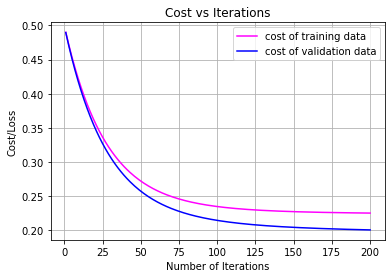

In [907]:
theta, loss_history_train, loss_history_validation = gradient_descent_2(X_Standardtrain, y_Standardtrain, theta, alpha, iterations, m[0], m[1], x_validation, y_validation, lamda)

total_loss_for_train = loss_history_train.sum()
total_loss_for_validation = loss_history_validation.sum()

print(theta)
plt.plot(range(1, iterations + 1), loss_history_train, color='magenta', label='cost of training data')
plt.plot(range(1, iterations + 1), loss_history_validation, color='blue', label='cost of validation data')
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost/Loss')
plt.title('Cost vs Iterations')
plt.legend()

# Problem 3 part b 12 inputs normalized with addtion of lamda term

In [908]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# normalizing the input data and target column
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [909]:
X_Normtrain = df_train.values[:,1:12]
y_Normtrain = df_train.values[:,0]
x_validation = df_test.values[:,1:12]
y_validation = df_test.values[:,0]

m = [len(X_Normtrain), len(x_validation)]
print(m)

y_Normtrain = y_Normtrain.reshape(m[0],1)
X0 = np.ones((m[0],1))
X_Normtrain = np.hstack((X0, X_Normtrain))

y_validation = y_validation.reshape(m[1],1)
X0 = np.ones((m[1],1))
x_validation = np.hstack((X0, x_validation))


[436, 109]


In [910]:
theta = np.zeros((12,1))
iterations = 200;
alpha = .01;
lamda = .5;

[[0.08805828855986557]
 [0.038139687997721744]
 [0.04681300011879759]
 [0.04169288795437535]
 [0.049705559189254275]
 [0.08388941346596321]
 [0.03200830000528784]
 [0.03896101184827183]
 [0.011699370533797958]
 [0.06425328612597503]
 [0.042447028503896346]
 [0.047748334559592966]]


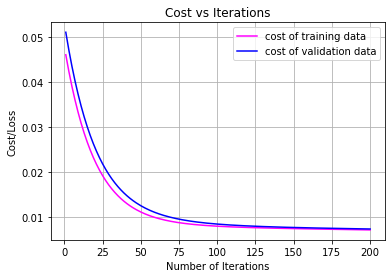

In [911]:
theta, loss_history_train, loss_history_validation = gradient_descent_2(X_Normtrain, y_Normtrain, theta, alpha, iterations, m[0], m[1], x_validation, y_validation, lamda)

total_loss_for_train = loss_history_train.sum()
total_loss_for_validation = loss_history_validation.sum()

print(theta)
plt.plot(range(1, iterations + 1), loss_history_train, color='magenta', label='cost of training data')
plt.plot(range(1, iterations + 1), loss_history_validation, color='blue', label='cost of validation data')
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost/Loss')
plt.title('Cost vs Iterations')
plt.legend()

# 12 inputs standaredized with added lamda term

In [927]:
#Splitting the Data Training and Testing Sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [928]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# standardized the input data and target column
scaler = StandardScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [929]:
X_Standardtrain = df_train.values[:,1:12]
y_Standardtrain = df_train.values[:,0]
x_validation = df_test.values[:,1:12]
y_validation = df_test.values[:,0]

m = [len(X_Standardtrain), len(x_validation)]
print(m)

y_Standardtrain = y_Standardtrain.reshape(m[0],1)
X0 = np.ones((m[0],1))
X_Standardtrain = np.hstack((X0, X_Standardtrain))

y_validation = y_validation.reshape(m[1],1)
X0 = np.ones((m[1],1))
x_validation = np.hstack((X0, x_validation))

[436, 109]


In [930]:
theta = np.zeros((12,1))
iterations = 1000;
alpha = .01;
lamda = .1;

[[-0.3066449250153809]
 [0.31560548175921804]
 [0.06012389906546737]
 [0.26973837023374236]
 [0.22456841844544762]
 [0.038661385163101185]
 [0.19541168184825977]
 [0.18831154801038297]
 [0.15052588684240853]
 [0.344453251264239]
 [0.13952312856449864]
 [0.30940957505833416]]


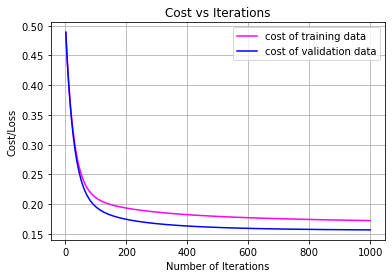

In [931]:
theta, loss_history_train, loss_history_validation = gradient_descent_2(X_Standardtrain, y_Standardtrain, theta, alpha, iterations, m[0], m[1], x_validation, y_validation, lamda)

total_loss_for_train = loss_history_train.sum()
total_loss_for_validation = loss_history_validation.sum()

print(theta)
plt.plot(range(1, iterations + 1), loss_history_train, color='magenta', label='cost of training data')
plt.plot(range(1, iterations + 1), loss_history_validation, color='blue', label='cost of validation data')
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost/Loss')
plt.title('Cost vs Iterations')
plt.legend()